In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load dataset

In [2]:

df = pd.read_csv('mushrooms.csv')
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w    

# 2. Basic data info

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y 

bruises: bruises=t,no=f 

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s 

gill-attachment: attached=a,descending=d,free=f,notched=n 

gill-spacing: close=c,crowded=w,distant=d 

gill-size: broad=b,narrow=n 

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y 

stalk-shape: enlarging=e,tapering=t 

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? 

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y 

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y 

veil-type: partial=p,universal=u 

veil-color: brown=n,orange=o,white=w,yellow=y 

ring-number: none=n,one=o,two=t 

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z 

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y 

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y 

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d 

 

In [3]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-col

# 3. Check for missing values

In [4]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


# 4. Visualize class distribution (poisonous vs edible)

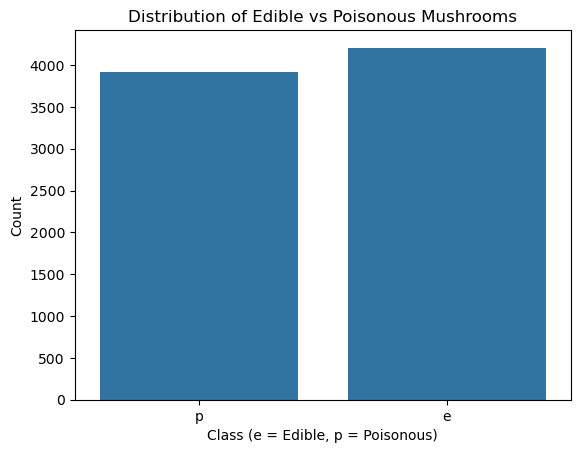

In [5]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('Class (e = Edible, p = Poisonous)')
plt.ylabel('Count')
plt.show()

# 5. Encode categorical variables

In [6]:
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# 6. Feature matrix (X) and target (y)

In [7]:
X = df.drop('class', axis=1)
y = df['class']

# 7. Train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train a Random Forest Classifier

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 9. Predictions

In [10]:
y_pred = model.predict(X_test)


# 10. Evaluation

In [11]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# 11. Confusion Matrix

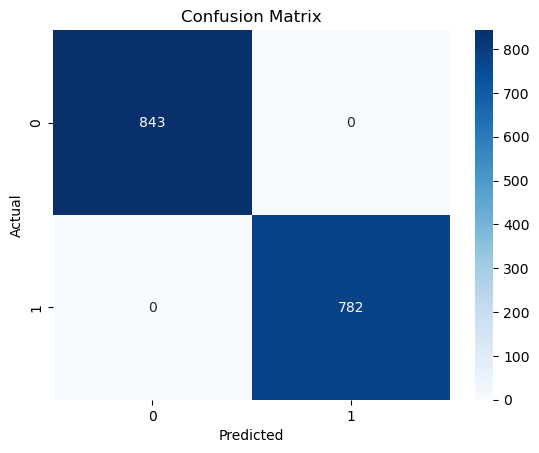

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 12. Feature importance

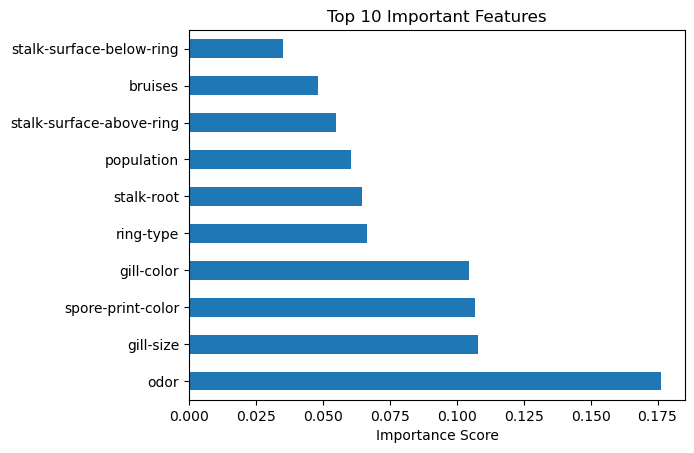

In [13]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()

I was surprised witht the perfect prediction thinking it was overfitting. I checked with a different classifier.

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier  # updated wrapper
import numpy as np
import tensorflow as tf  # Make sure TensorFlow is imported

# Define the model directly
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Wrap the model
keras_model = KerasClassifier(model=model, epochs=10, batch_size=32, verbose=0)

# Setup Stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
results = cross_val_score(keras_model, X, y, cv=kfold, scoring='accuracy')

# Print the results
print("Cross-validation accuracy scores:", results)
print("Mean accuracy: {:.4f}, Std Dev: {:.4f}".format(results.mean(), results.std()))


C:\Users\heart\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\heart\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\heart\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\heart\AppData\Roaming\Python\Python312\site-packag

Cross-validation accuracy scores: [0.98461538 0.97476923 0.98276923 0.97907692 0.98891626]
Mean accuracy: 0.9820, Std Dev: 0.0048


Very clean or overly simplified data
– The mushroom dataset from UCI is well-known for being very easy to classify due to features like odor or spore print color that are highly predictive.